In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
%matplotlib inline
# Import dependancies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt

# Machine learning on car collision data

In [52]:
# Load the data
file_path = Path('collision_data_ml_mc.csv')
ml_df = pd.read_csv(file_path)
ml_df

,case_id,party_number,victim_number,accident_year,collision_time,day_of_week,weather_1,primary_coll_factor,type_of_collision,at_fault,...,road_cond_1,lighting,point_x,point_y,victim_age,severe_injury,safety_equip_used,victim_sex,victim_seating_postion,victim_ejected
0,8929468,2,1,2019,605,2,A,A,A,N,...,H,B,-118.413193,34.240921,33,1,PW,M,1,1
1,8347190,2,1,2017,2310,3,A,A,B,N,...,H,C,-118.311476,34.094770,34,0,PW,M,2,2
2,8552280,1,1,2018,2108,3,A,A,E,Y,...,H,C,-117.991074,34.113041,24,1,PW,M,1,1
3,8484253,2,1,2017,2330,7,A,A,D,N,...,H,A,-118.309220,34.098100,24,0,PW,M,1,0
4,8729250,1,1,2018,450,6,A,A,F,Y,...,H,C,-118.063805,33.945267,21,1,PW,M,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,8972992,2,1,2019,1515,3,A,A,D,N,...,H,A,-118.501144,34.203259,27,1,PW,M,1,1
3142,8491183,1,1,2017,1310,6,A,A,A,Y,...,H,A,-118.578760,34.274730,18,0,PW,M,1,1
3143,8789954,1,1,2018,1840,3,A,A,D,Y,...,H,C,-118.518547,34.162418,30,0,PW,M,1,1
3144,8789954,1,2,2018,1840,3,A,A,D,Y,...,H,C,-118.518547,34.162418,12,0,PY,M,4,1


In [53]:
ml_df = ml_df.drop(columns=["case_id", "party_number", "victim_number", 
                            "accident_year", "vehicle_make", "point_x", 
                            "point_y", "stwd_vehicle_type", "oaf_1", 
                            "primary_coll_factor", "party_sex", "at_fault",
                           "victim_age", "victim_sex", "race"])
ml_df
                   

,collision_time,day_of_week,weather_1,type_of_collision,party_soberiety,move_pre_acc,vehicle_year,road_surface,road_cond_1,lighting,severe_injury,safety_equip_used,victim_seating_postion,victim_ejected
0,605,2,A,A,G,B,2018,A,H,B,1,PW,1,1
1,2310,3,A,B,C,B,2011,A,H,C,0,PW,2,2
2,2108,3,A,E,A,B,2005,A,H,C,1,PW,1,1
3,2330,7,A,D,A,B,1995,A,H,A,0,PW,1,0
4,450,6,A,F,A,B,2007,A,H,C,1,PW,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,1515,3,A,D,A,B,2018,A,H,A,1,PW,1,1
3142,1310,6,A,A,H,B,2000,A,H,A,0,PW,1,1
3143,1840,3,A,D,A,I,2016,A,H,C,0,PW,1,1
3144,1840,3,A,D,A,I,2016,A,H,C,0,PY,4,1


In [54]:
ml_df.dtypes[ml_df.dtypes != 'int64'][ml_df.dtypes != 'float64']

weather_1            object
type_of_collision    object
party_soberiety      object
move_pre_acc         object
road_surface         object
road_cond_1          object
lighting             object
safety_equip_used    object
dtype: object

In [55]:
# Check weather data
weather_types = ml_df["weather_1"].value_counts()
weather_types

A    2908
B     199
C      29
E       5
G       3
F       2
Name: weather_1, dtype: int64

A - Clear
B - Cloudy
C - Raining
D - Snowing
E - Fog
F - Other
G - Wind

A - (Vehicle) Code Violation
B - Other Improper Driving

In [56]:
# Check type of collision
ml_df["type_of_collision"].value_counts()

D    1381
B     575
C     453
A     246
E     180
H     154
F     143
G      14
Name: type_of_collision, dtype: int64

A - Head-On
B - Sideswipe
C - Rear End
D - Broadside
E - Hit Object
F - Overturned
G - Vehicle/Pedestrian
H - Other

In [57]:
# Check sobriety factor
ml_df["party_soberiety"].value_counts()

A    2764
G     183
H      80
B      61
D      31
C      27
Name: party_soberiety, dtype: int64

A - Had not been Drinking
B - Had been Drinking, Under Influence
C - Had been Drinking, Not Under Influence
D - Had been Drinking, Impairment Unknown
G - Impairment Unknown
H - Not Applicable

A - Violation
E - Vision Obscurements
F - Inattention (beginning 1/1/01; see Inattention Item Name near end of record for A-K, P values)
G - Stop and Go Traffic
H - Entering/Leaving Ramp
I - Previous Collision
J - Unfamiliar With Road
K - Defective Vehicle Equipment
L - Uninvolved Vehicle
M - Other
N - None Apparent
O - Runaway Vehicle
P - Inattention, Cell Phone (1/1/01)
Q - Inattention, Electronic Equip.(1/1/01)
R - Inattention, Radio/CD (1/1/01)
S - Inattention, Smoking (1/1/01)
T - Inattention, Eating (1/1/01)
U - Inattention, Children (1/1/01)
V - Inattention, Animal (1/1/01)
W - Inattention, Personal Hygiene (1/1/01)
X - Inattention, Reading (1/1/01)
Y - Inattention, Other (1/1/01)
- - Not Stated

In [58]:
# Check movement pre accident factor
move_pre_acc = ml_df["move_pre_acc"].value_counts()
move_pre_acc

B    2444
E     143
A     124
I     100
H      61
J      57
D      51
M      47
R      38
C      28
N      16
L      14
F       9
Q       6
G       3
P       3
K       1
O       1
Name: move_pre_acc, dtype: int64

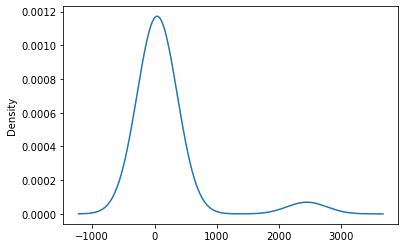

In [59]:
# Visualize the value counts of move_pre_acc
plot = move_pre_acc.plot.density()
fig = plot.get_figure()


A - Stopped
B - Proceeding Straight
C - Ran Off Road
D - Making Right Turn
E - Making Left Turn
F - Making U-Turn
G - Backing
H - Slowing/Stopping
I - Passing Other Vehicle
J - Changing Lanes
K - Parking Maneuver
L - Entering Traffic
M - Other Unsafe Turning
N - Crossed Into Opposing Lane
O - Parked
P - Merging
Q - Traveling Wrong Way
R - Other
- - Not Stated

In [60]:
# Check road type factor
road_surface = ml_df["road_surface"].value_counts()
road_surface

A    3077
B      68
D       1
Name: road_surface, dtype: int64

In [61]:
# Determine which values to replace if counts are less than ...?
replace_road_surface = list(road_surface[road_surface < 2000].index)

# Replace in dataframe
for app in replace_road_surface:
    ml_df.road_surface = ml_df.road_surface.replace(app,"slippery")
    
# Check to make sure binning was successful
ml_df.road_surface.value_counts()

A           3077
slippery      69
Name: road_surface, dtype: int64

A - Dry
B - Wet
C - Snowy or Icy
D - Slippery 

In [62]:
# Check road conditions factor
ml_df["road_cond_1"].value_counts()

H    3084
D      23
A      13
G       9
B       7
C       5
E       4
F       1
Name: road_cond_1, dtype: int64

	
A - Holes, Deep Ruts
B - Loose Material on Roadway
C - Obstruction on Roadway
D - Construction or Repair Zone
E - Reduced Roadway Width
F - Flooded
G - Other
H - No Unusual Condition

In [63]:
# Check lighting conditions factor
ml_df["lighting"].value_counts()

A    2177
C     788
B     137
D      41
E       3
Name: lighting, dtype: int64

	
A - Daylight
B - Dusk - Dawn
C - Dark - Street Lights
D - Dark - No Street Lights
E - Dark - Street Lights Not 

In [64]:
# Check safety equipment used conditions factor
pd.set_option('display.max_rows', 120)
ml_df["safety_equip_used"].value_counts()

PW    2351
GM     156
AP      92
MW      85
PY      80
PV      79
GL      68
NW      50
MP      23
BP      20
AW      19
AM      13
GP      10
LW       9
PP       8
PX       7
BM       6
PQ       5
PU       5
MY       5
NP       4
AN       4
GN       4
EL       4
MQ       4
LM       3
HP       3
HM       3
GQ       2
MV       2
LQ       2
CM       2
MR       2
HL       2
UW       2
CL       1
BL       1
DW       1
NU       1
DM       1
MX       1
NV       1
LP       1
FW       1
GW       1
CW       1
MN       1
Name: safety_equip_used, dtype: int64

A - None in Vehicle
B - Unknown
C - Lap Belt Used
D - Lap Belt Not Used
E - Shoulder Harness Used
F - Shoulder Harness Not Used
G - Lap/Shoulder Harness Used
H - Lap/Shoulder Harness Not Used
J - Passive Restraint Used
K - Passive Restraint Not Used
L - Air Bag Deployed
M - Air Bag Not Deployed
N - Other
P - Not Required
Q - Child Restraint in Vehicle Used
R - Child Restraint in Vehicle Not Used
S - Child Restraint in Vehicle, Use Unknown
T - Child Restraint in Vehicle, Improper Use
U - No Child Restraint in Vehicle
V - Driver, Motorcycle Helmet Not Used
W - Driver, Motorcycle Helmet Used
X - Passenger, Motorcycle Helmet Not Used
Y - Passenger, Motorcycle Helmet Used
- or blank - Not Stated AX  Z ˛z

# Machine Learning Modeling

In [65]:
# Convert strings to numeric values
from sklearn.preprocessing import LabelEncoder
ml_encoded = pd.get_dummies(ml_df, columns=["weather_1", "type_of_collision", "party_soberiety", 
                                            "move_pre_acc", "road_surface", "road_cond_1", 
                                            "lighting", "safety_equip_used"])
ml_encoded.head()

,collision_time,day_of_week,vehicle_year,severe_injury,victim_seating_postion,victim_ejected,weather_1_A,weather_1_B,weather_1_C,weather_1_E,...,safety_equip_used_NV,safety_equip_used_NW,safety_equip_used_PP,safety_equip_used_PQ,safety_equip_used_PU,safety_equip_used_PV,safety_equip_used_PW,safety_equip_used_PX,safety_equip_used_PY,safety_equip_used_UW
0,605,2,2018,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2310,3,2011,0,2,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2108,3,2005,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2330,7,1995,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,450,6,2007,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
# Create our features

X = ml_encoded.drop("severe_injury", axis=1)
X.head()

# Create our target
y = ml_encoded["severe_injury"]

In [69]:
# Check the balance of our target values
y.value_counts()

0    2373
1     773
Name: severe_injury, dtype: int64

In [73]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Determine the shape of our training and testing sets.
print(f"Training Set X", X_train.shape)
print(f"Testing Set X", X_test.shape)
print(f"Training Set y", y_train.shape)
print(f"Testing Set y", y_test.shape)

Training Set X (2359, 105)
Testing Set X (787, 105)
Training Set y (2359,)
Testing Set y (787,)


# Random Oversampler

In [74]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 1795, 1: 1795})

In [75]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [76]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.6714709622721492
Testing Score: 0.650571791613723


In [77]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6292362709226669

In [78]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,390,188
Actual Severe/Fatality,87,122


# SMOTE Imbalanced sampling 

In [79]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({0: 1795, 1: 1795})

In [80]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [81]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.7579482831708351
Testing Score: 0.7369758576874206


In [82]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5857311965033691

In [128]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,375,203
Actual Severe/Fatality,62,147


In [84]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.77      0.91      0.26      0.84      0.49      0.25       578
          1       0.51      0.26      0.91      0.35      0.49      0.22       209

avg / total       0.70      0.74      0.43      0.71      0.49      0.25       787



# SMOTEENN Imbalanced sampling

In [85]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 600, 1: 1039})

In [86]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [87]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5908635618615585

In [88]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted High Risk", "Predicted Low Risk"])

cm_df

,Predicted High Risk,Predicted Low Risk
Actual Minor/No Injuries,365,213
Actual Severe/Fatality,94,115


In [136]:
# Print the imbalanced classification report
print( classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.65      0.70      0.74      0.68      0.45       578
          1       0.42      0.70      0.65      0.53      0.68      0.46       209

avg / total       0.74      0.66      0.69      0.68      0.68      0.46       787



# Balanced Random Forest Classifier

In [90]:
# Imported sklearn and imblearn dependancies
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn import datasets

In [130]:
# Creating a StandardScaler instance and fit with the training data.
scaler = StandardScaler().fit(X_train)
# Scale the X data
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2359, 105)
(787, 105)
(2359,)
(787,)


In [131]:
# Resample the training data with the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators = 100, random_state=1)

# Fitting the model
brf_model = brf_model.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {brf_model.score(X_train_scaler, y_train)}')
print(f'Testing Score: {brf_model.score(X_test_scaler, y_test)}')

# Make Prediction
predictions = brf_model.predict(X_test_scaler)

Training Score: 0.8715557439593048
Testing Score: 0.6493011435832274


In [132]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.6493011435832274

In [134]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])
cm_df


,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,384,194
Actual Severe/Fatality,82,127


In [95]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.66      0.61      0.74      0.64      0.41       578
          1       0.40      0.61      0.66      0.48      0.64      0.40       209

avg / total       0.71      0.65      0.62      0.67      0.64      0.40       787



In [103]:
# List the features sorted in descending order by feature importance
ranked_importances = brf_model.feature_importances_


In [118]:
# Create dataframe with X data for ranked importance columns
ml_encoded_X = ml_encoded.drop("severe_injury", axis=1)
ml_encoded_X

,collision_time,day_of_week,vehicle_year,victim_seating_postion,victim_ejected,weather_1_A,weather_1_B,weather_1_C,weather_1_E,weather_1_F,...,safety_equip_used_NV,safety_equip_used_NW,safety_equip_used_PP,safety_equip_used_PQ,safety_equip_used_PU,safety_equip_used_PV,safety_equip_used_PW,safety_equip_used_PX,safety_equip_used_PY,safety_equip_used_UW
0,605,2,2018,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2310,3,2011,2,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2108,3,2005,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2330,7,1995,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,450,6,2007,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,1515,3,2018,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3142,1310,6,2000,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3143,1840,3,2016,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3144,1840,3,2016,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [119]:
# Create dataframe containing ranked and sorted feature importances
ranked_importances = sorted(zip(brf_model.feature_importances_, ml_encoded_X.columns), reverse=True)
ranked_importances

[(0.21736484303001352, 'collision_time'),
 (0.1645375654887731, 'vehicle_year'),
 (0.10857720092105207, 'day_of_week'),
 (0.08357744955134458, 'victim_ejected'),
 (0.03413936919074882, 'party_soberiety_A'),
 (0.031010582604168436, 'party_soberiety_G'),
 (0.020333900935422533, 'type_of_collision_D'),
 (0.02007997409807437, 'victim_seating_postion'),
 (0.017167788742349577, 'safety_equip_used_PW'),
 (0.017115676563072436, 'type_of_collision_B'),
 (0.016072337156741737, 'move_pre_acc_B'),
 (0.015853524809241504, 'lighting_A'),
 (0.015203167739918375, 'type_of_collision_C'),
 (0.014160834638568251, 'lighting_C'),
 (0.01321382525619979, 'type_of_collision_A'),
 (0.011443571097337395, 'safety_equip_used_GM'),
 (0.01093131026922169, 'type_of_collision_H'),
 (0.010304015338620881, 'weather_1_A'),
 (0.008997648347240001, 'weather_1_B'),
 (0.008721630592115361, 'type_of_collision_E'),
 (0.008388818998166845, 'lighting_B'),
 (0.008255387034778424, 'type_of_collision_F'),
 (0.007838254237843926, '

In [120]:
# Create dataframe containing ranked and sorted feature importances
ranked_importances_df = pd.DataFrame(sorted(ranked_importances, reverse=True), columns=["Importance", "Feature"])
ranked_importances_df

,Importance,Feature
0,0.217365,collision_time
1,0.164538,vehicle_year
2,0.108577,day_of_week
3,0.083577,victim_ejected
4,0.034139,party_soberiety_A
5,0.031011,party_soberiety_G
6,0.020334,type_of_collision_D
7,0.020080,victim_seating_postion
8,0.017168,safety_equip_used_PW
9,0.017116,type_of_collision_B


<Figure size 1440x720 with 0 Axes>

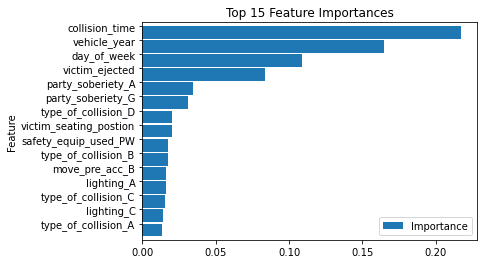

In [121]:
# Visualize top 10 feature importances
top_importances_df = ranked_importances_df.head(15)

plt.figure(figsize=(20,10))
top_importances_df.plot.barh(x="Feature", y="Importance", align='edge', width=0.9,
                      title="Top 15 Feature Importances",
                           ylabel="% Importance")
plt.gca().invert_yaxis()
plt.show
plt.savefig('topfeatureranking.png')


In [122]:
# Show count of total estimators in Balanced Random Forest Classifier
print(len(brf_model.estimators_))

100


# Easy Ensemble Classifier

In [123]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {eec.score(X_train_scaler, y_train)}')
print(f'Testing Score: {eec.score(X_test_scaler, y_test)}')


predictions = eec.predict(X_test_scaler)

Training Score: 0.6782534972445952
Testing Score: 0.6632782719186785


In [124]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.6632782719186785

In [125]:
# Display the confusion matrix
y_pred = eec.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_pred)

In [126]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Low Injury", "Actual High Injury"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df


,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Low Injury,375,203
Actual High Injury,62,147


In [127]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.65      0.70      0.74      0.68      0.45       578
          1       0.42      0.70      0.65      0.53      0.68      0.46       209

avg / total       0.74      0.66      0.69      0.68      0.68      0.46       787

